Regression Analysis: Use the diabetes data set from UCI and
Pima Indians Diabetes data set for performing
the following:
<br>
a. Univariate analysis: Frequency, Mean, Median, Mode,
Variance, Standard
Deviation, Skewness and Kurtosis
<br>
b. Bivariate analysis: Linear and logistic regression modeling
<br>
c. Multiple Regression analysis
<br>
d. Also compare the results of the above analysis for the two data
sets
<br>
Dataset link: https://www.kaggle.com/datasets/uciml/pima-
indians-diabetes-database

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Load the dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:

# Checking basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
D


Univariate Analysis:
                                Mean    Median    Mode      Variance  \
Pregnancies                 3.845052    3.0000   1.000     11.354056   
Glucose                   120.894531  117.0000  99.000   1022.248314   
BloodPressure              69.105469   72.0000  70.000    374.647271   
SkinThickness              20.536458   23.0000   0.000    254.473245   
Insulin                    79.799479   30.5000   0.000  13281.180078   
BMI                        31.992578   32.0000  32.000     62.159984   
DiabetesPedigreeFunction    0.471876    0.3725   0.254      0.109779   
Age                        33.240885   29.0000  22.000    138.303046   
Outcome                     0.348958    0.0000   0.000      0.227483   

                          Standard Deviation  Skewness  Kurtosis  
Pregnancies                         3.369578  0.901674  0.159220  
Glucose                            31.972618  0.173754  0.640780  
BloodPressure                      19.355807 -1.843608  

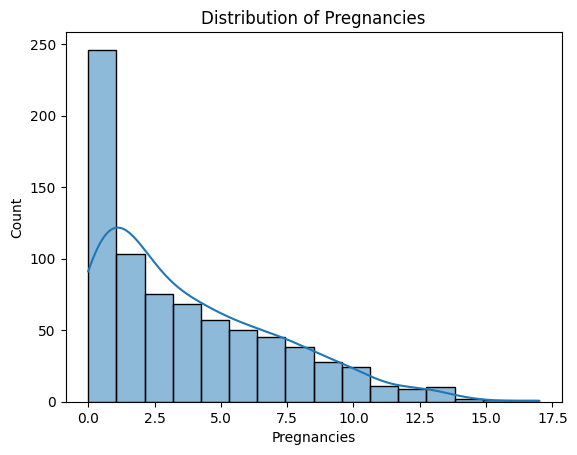

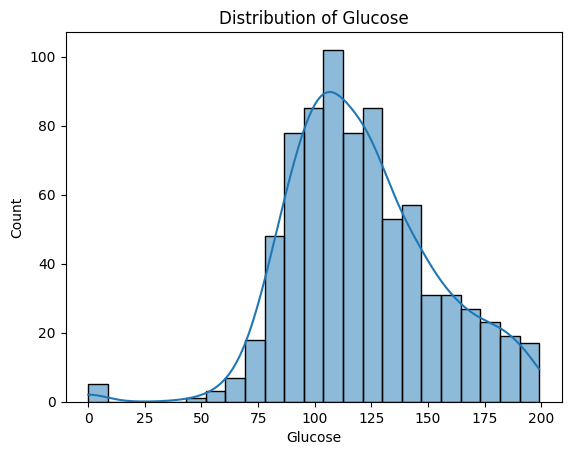

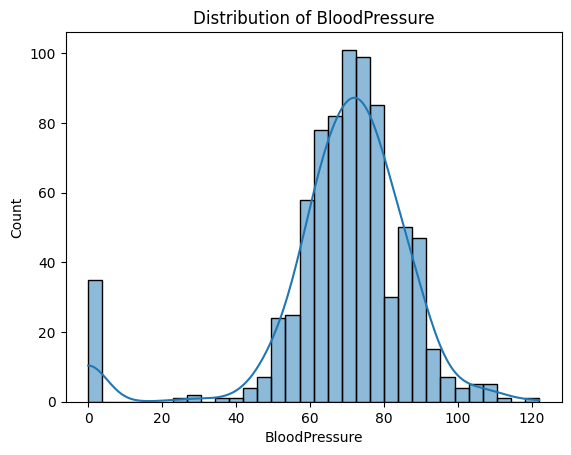

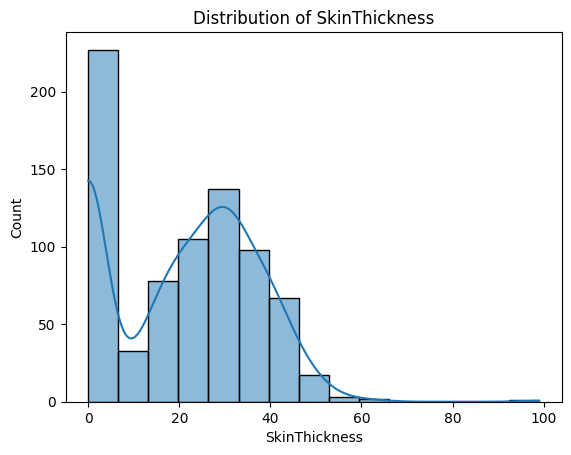

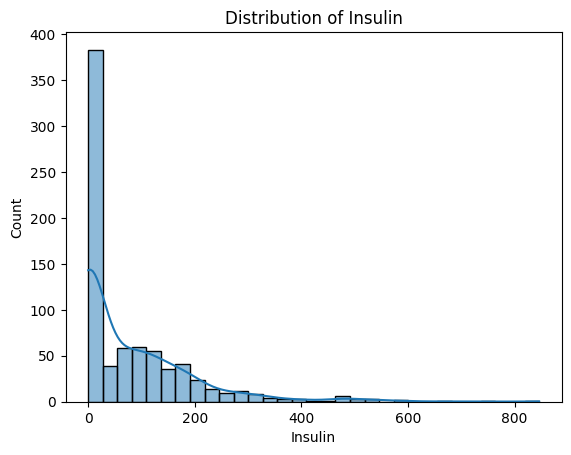

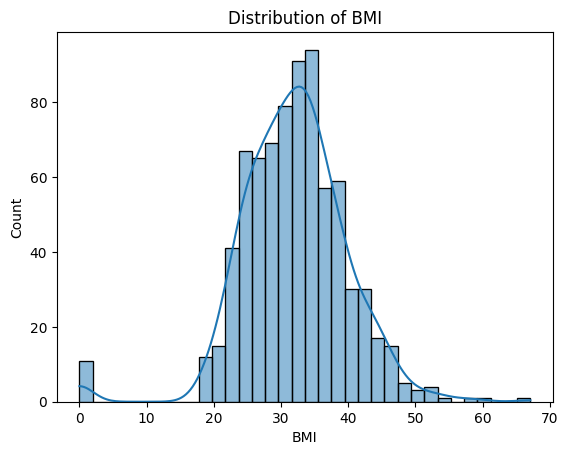

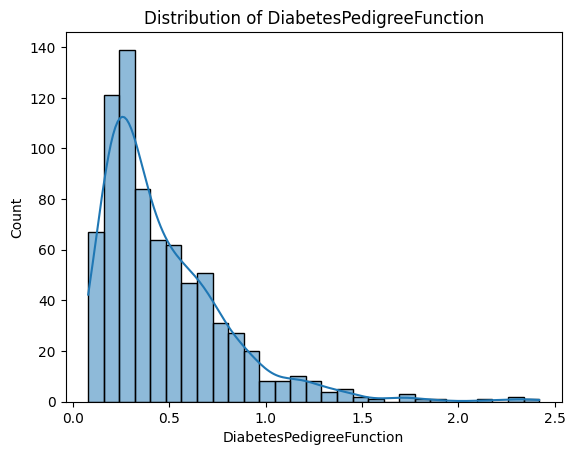

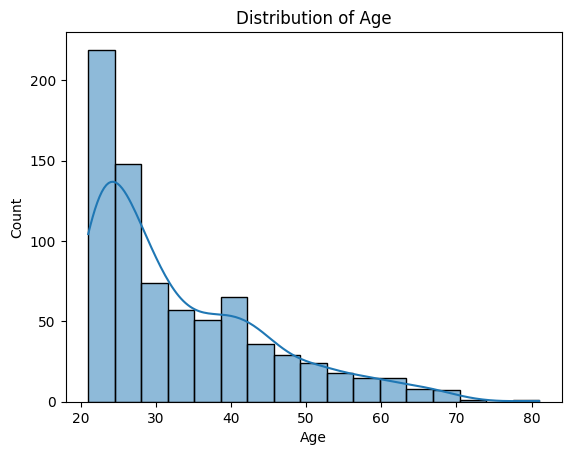

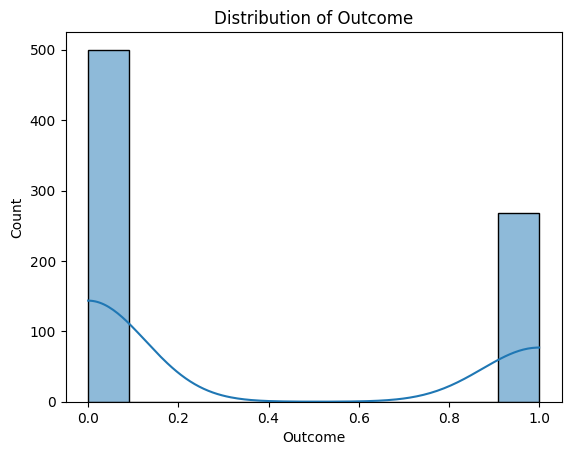

In [3]:

# ------- Part (a): Univariate Analysis ---------

# Univariate statistics: Frequency, Mean, Median, Mode, Variance, Std Deviation, Skewness, and Kurtosis
univariate_stats = {}
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        stats_summary = {
            'Mean': data[col].mean(),
            'Median': data[col].median(),
            'Mode': data[col].mode()[0],
            'Variance': data[col].var(),
            'Standard Deviation': data[col].std(),
            'Skewness': data[col].skew(),
            'Kurtosis': data[col].kurt()
        }
        univariate_stats[col] = stats_summary

# Display Univariate Analysis Results
print("\nUnivariate Analysis:")
univariate_df = pd.DataFrame(univariate_stats)
print(univariate_df.T)

# Plot distribution for numerical columns
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



In [4]:
# ------- Part (b): Bivariate Analysis ---------

# Defining features (X) and target (y)
X = data.drop(columns=['Outcome'])  # assuming 'Outcome' is the target for classification
y = data['Outcome']

# Train-test split for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Results for Linear Regression
print("\nLinear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lin))
print("R-squared:", r2_score(y_test, y_pred_lin))

# Results for Logistic Regression
print("\nLogistic Regression:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))




Linear Regression:
Mean Squared Error (MSE): 0.17104527280850104
R-squared: 0.25500281176741757

Logistic Regression:
Accuracy Score: 0.7467532467532467


In [5]:
# ------- Part (c): Multiple Regression Analysis ---------

# Perform Multiple Linear Regression
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

# Multiple regression results
print("\nMultiple Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_multi))
print("R-squared:", r2_score(y_test, y_pred_multi))




Multiple Regression:
Mean Squared Error (MSE): 0.17104527280850104
R-squared: 0.25500281176741757


In [ ]:
# ------- Part (d): Compare the results for the two datasets ---------
# You can repeat the same analysis for the UCI diabetes dataset
# Load UCI Diabetes dataset and follow the same steps for comparison
# uci_data = pd.read_csv('path_to_uci_diabetes.csv')
# Follow the same steps to compare the results
